In [531]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

g_label_fontsize = 16

colors = [
    "#999999",
    "#888888",
    "#FF9999",
]

hatches = ["\\", "/", "x"]

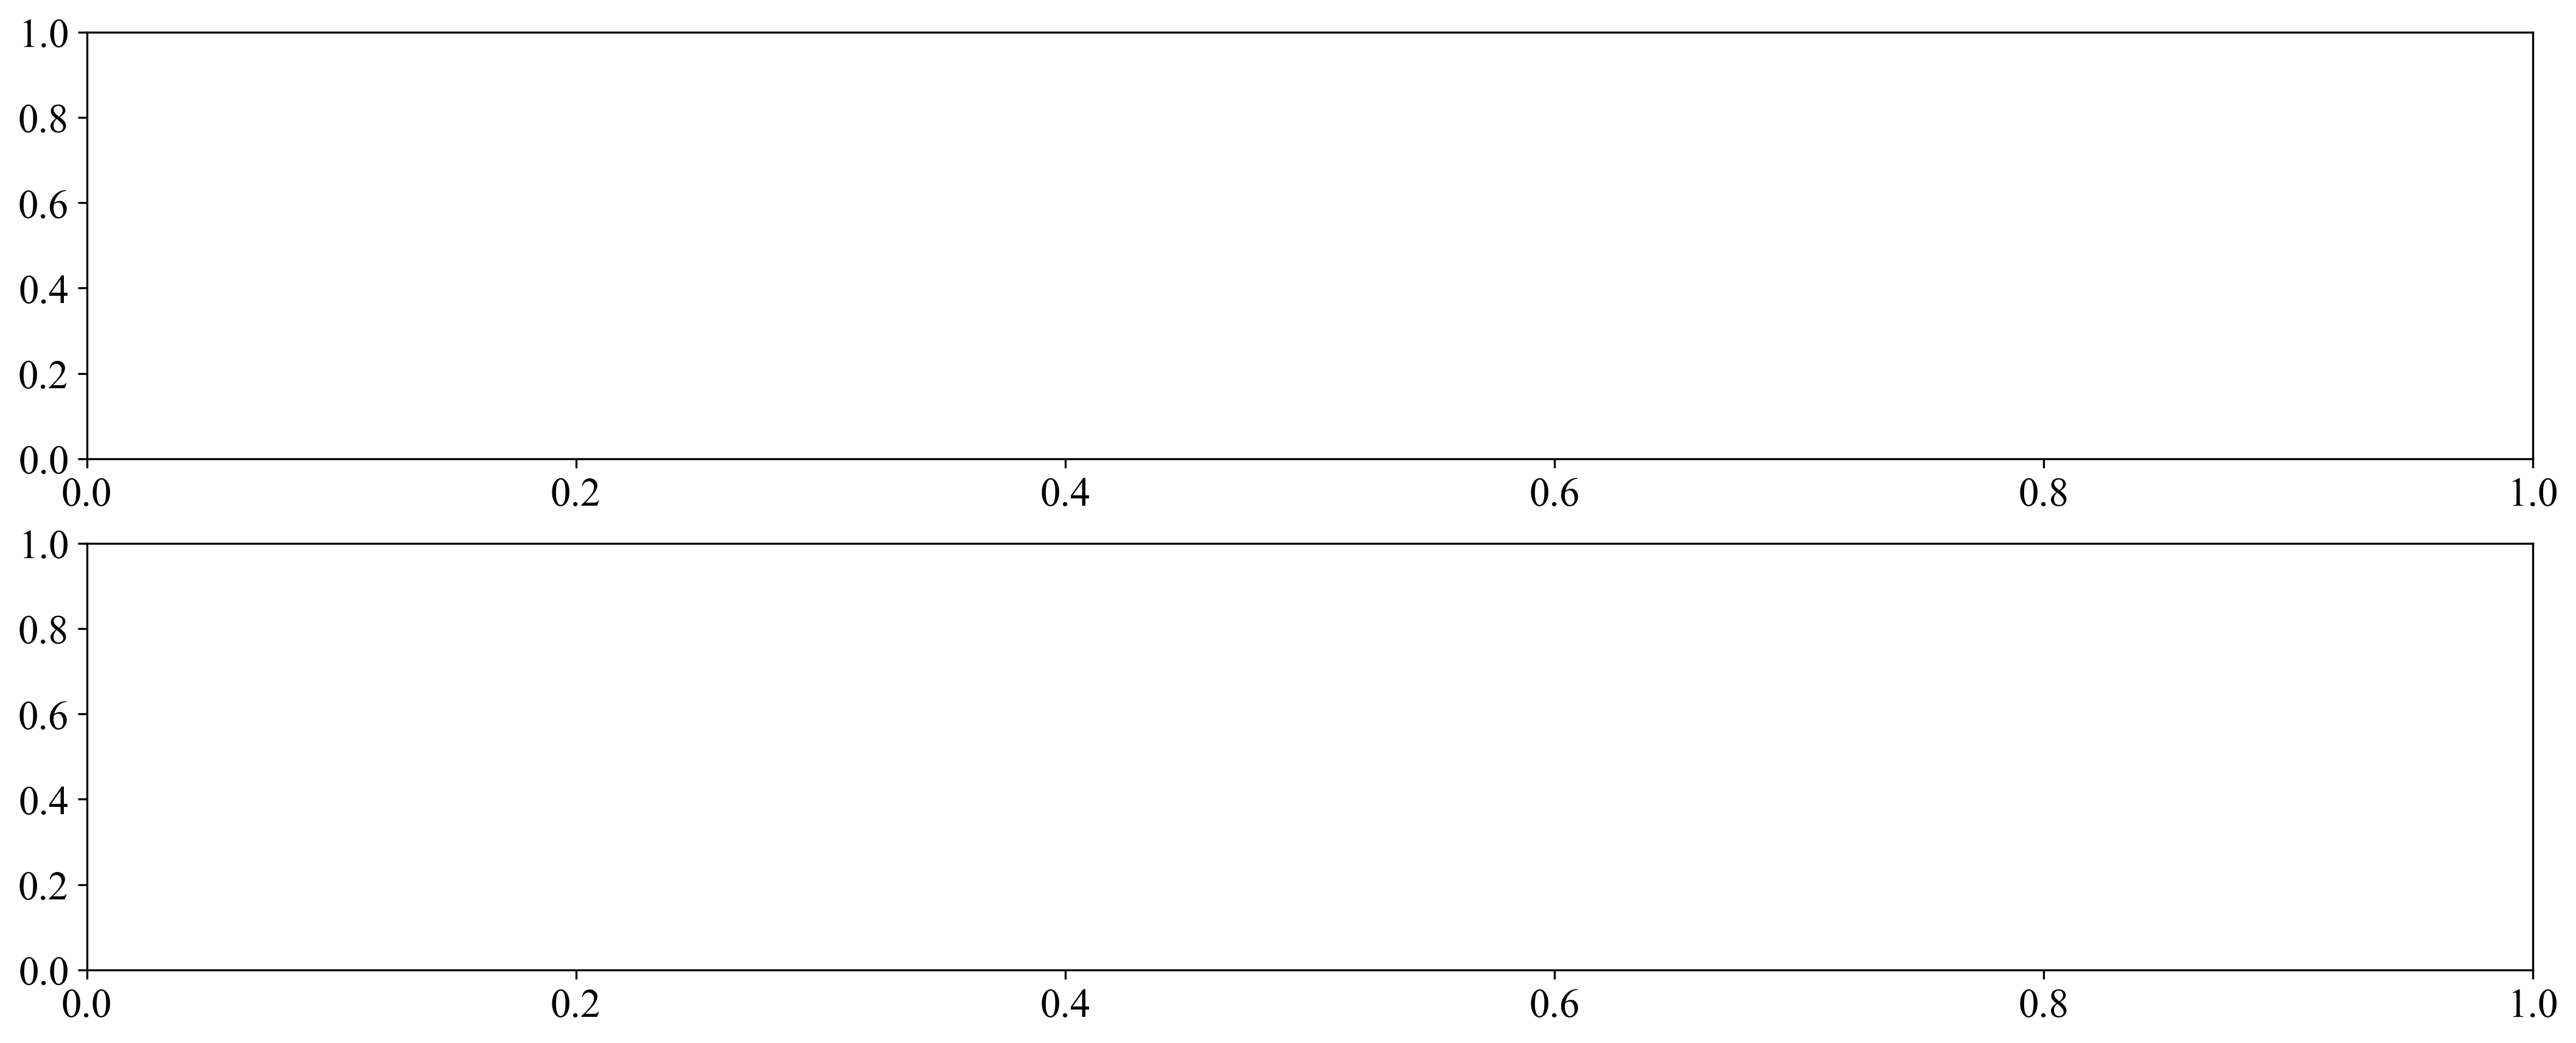

In [532]:
fig, ax = plt.subplots(
    figsize=(14, 14 / 2.5), ncols=1, nrows=2, constrained_layout=True, dpi=300
)

In [533]:
data_a = {
    "ModelA\n#8GPUs": [53, 53, 65],  # 22.64
    "ModelA\n#16GPUs": [53, 53, 65],  # 22.64
    "ModelB\n#8GPUs": [35, 35, 48],  # 37
    "ModelB\n#16GPUs": [35, 35, 48],  # 37
    "ModelC\n#8GPUs": [53, 53, 65],  # 22.64
    "ModelC\n#16GPUs": [53, 53, 65],  # 22.64
    "ModelD\n#8GPUs": [53, 53, 65],  # 22.64
    "ModelD\n#16GPUs": [53, 53, 65],  # 22.64
}

In [534]:
data_b = {
    "ModelA\n#8GPUs": [[54, 62, 12], [10, 10, 10]],
    "ModelA\n#16GPUs": [[54, 62, 12], [10, 10, 10]],
    "ModelB\n#8GPUs": [[52, 62, 12], [10, 10, 10]],
    "ModelB\n#16GPUs": [[52, 62, 12], [10, 10, 10]],
    "ModelC\n#8GPUs": [[52, 62, 12], [10, 10, 10]],
    "ModelC\n#16GPUs": [[52, 62, 12], [10, 10, 10]],
    "ModelD\n#8GPUs": [[52, 62, 12], [10, 10, 10]],
    "ModelD\n#16GPUs": [[52, 62, 12], [10, 10, 10]],
}

In [535]:
legend_labels = ["FSDP", "FSDP+XLA", "FSDP+DLRover-Lynx"]

In [536]:
bar_width = 0.2
group_spaing = 0.15

group_positions = {}
current_pos = 0

for x_label, y_data in data_a.items():
    group_positions[x_label] = []
    for i in range(len(y_data)):
        group_positions[x_label].append(current_pos)
        current_pos += bar_width
    current_pos += group_spaing

group_centers = {}
for x_label, positions in group_positions.items():
    group_centers[x_label] = sum(positions) / len(positions)

In [537]:
for x_label, y_data in data_a.items():
    positions = group_positions[x_label]
    for i, (pos, value, color, hatch) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            hatches,
        )
    ):
        ax[0].bar(
            pos,
            value,
            width=bar_width,
            color=color,
            edgecolor="black",
            hatch=hatch,
        )

ax[0].set_xticks(list(group_centers.values()))
ax[0].set_xticklabels(list(data_a.keys()))

ax[0].set_ylim(0, 100)
ax[0].set_yticks([0, 50, 100])
ax[0].set_yticklabels(["0", "50", "100"], rotation=90, ha="center", va="center")

ax[0].tick_params(axis="x", bottom=False, labelsize=11, pad=1)
ax[0].tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax[0].set_ylabel("MFU (%)", fontsize=g_label_fontsize)
ax[0].set_title("(a)")

Text(0.5, 1.0, '(a)')

In [538]:
for x_label, y_data in data_b.items():
    positions = group_positions[x_label]
    for i, (pos, value, ovalue, color, hatch) in enumerate(
        zip(
            positions,
            y_data[0],
            y_data[1],
            colors,
            hatches,
        )
    ):
        ax[1].bar(
            pos,
            value,
            width=bar_width,
            color=color,
            edgecolor="black",
            hatch=hatch,
        )

ax[1].set_xticks(list(group_centers.values()))
ax[1].set_xticklabels(list(data_a.keys()))

ax[1].set_ylim(0, 100)
ax[1].set_yticks([0, 50, 100])
ax[1].set_yticklabels(["0", "50", "100"], rotation=90, ha="center", va="center")

ax[1].tick_params(axis="x", bottom=False, labelsize=11, pad=1)
ax[1].tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax[1].set_ylabel("Communication\nProportion (%)", fontsize=g_label_fontsize)
ax[1].set_title("(b)")

Text(0.5, 1.0, '(b)')

In [539]:
# fig.legend(
#     ncol=4,
#     loc="upper center",
#     frameon=True,
#     shadow=False,
#     bbox_to_anchor=(0.5, 1.10),
#     fontsize=g_label_fontsize,
# )

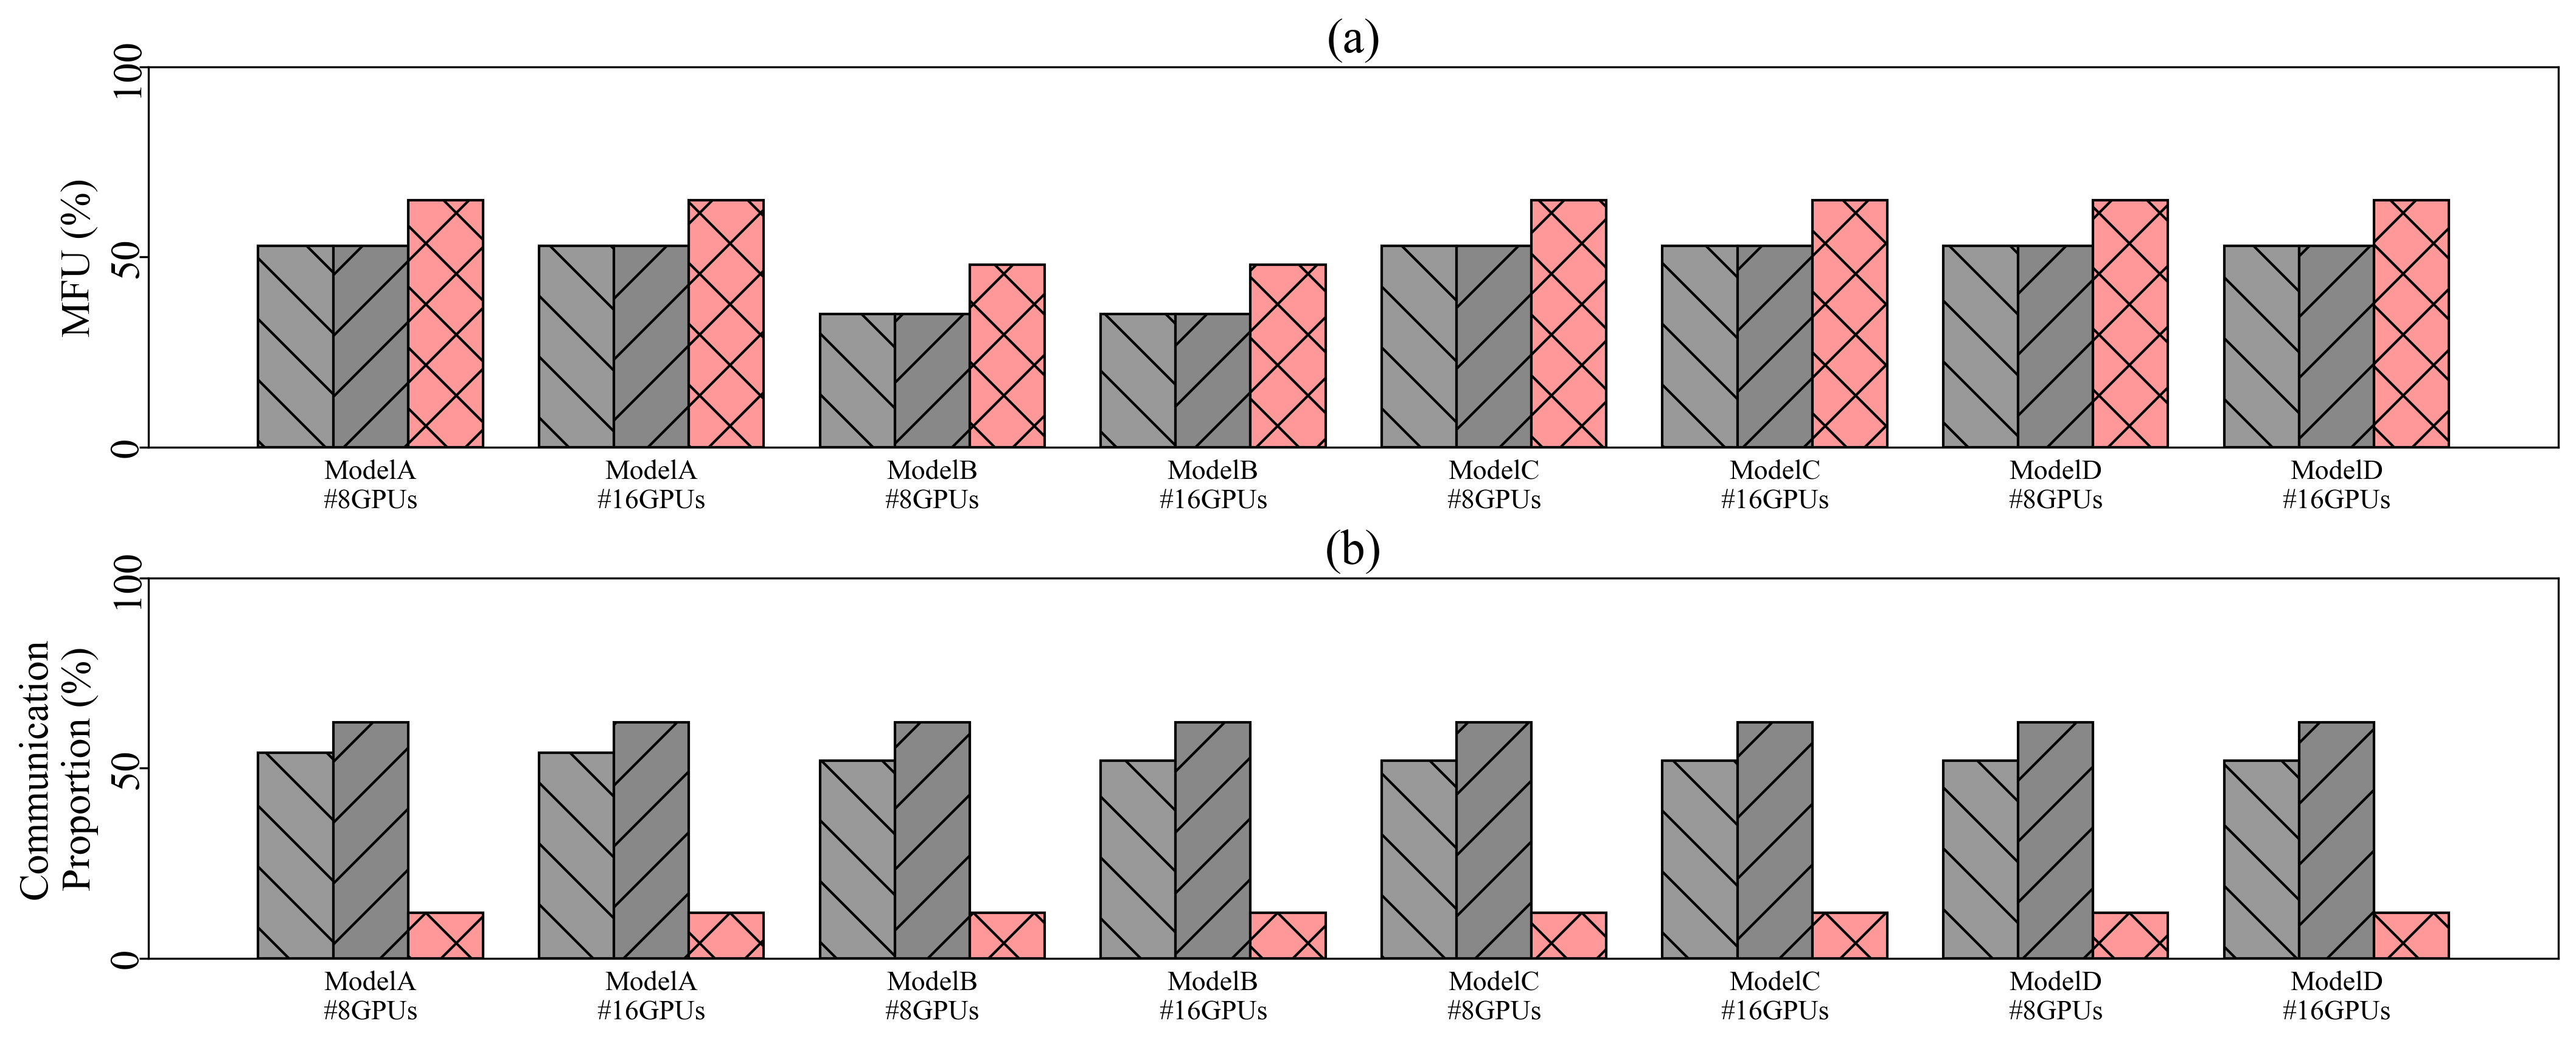

In [540]:
fig.savefig("lynx_end_to_end.pdf", bbox_inches="tight", dpi=1000)
fig